<a href="https://colab.research.google.com/github/YersonMamani/GR07-Regresion_Clasificacion/blob/main/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. REGRESIÓN
##Diamond Prices
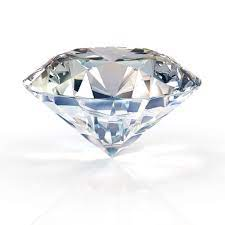





###1.1. Descripción del problema
Este proyecto tiene como objetivo desarrollar un modelo de regresión para predecir los precios de los diamantes. Se cuenta con un conjunto de datos que incluye información sobre 54,000 diamantes de talla redonda, con 10 características. Estas características incluyen el quilate del diamante, el tipo de corte, el color, la claridad, la profundidad, la tabla, el precio, así como las dimensiones del diamante en términos de longitud, anchura y profundidad (representadas por las variables x, y, z). El modelo buscará establecer una relación entre estas características y los precios de los diamantes, con el fin de realizar predicciones precisas para diamantes desconocidos.

####a. Carat (Quilates)
Es una medida de peso. Un quilate son 0,2 gramos o 200 miligramo
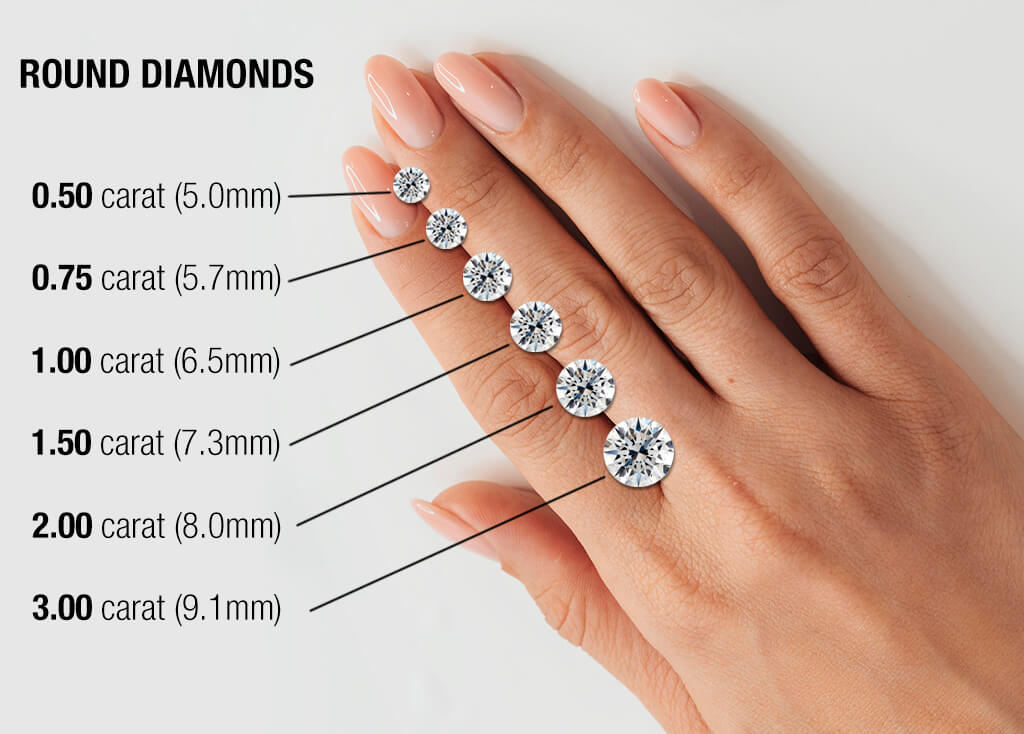



####b. Cut (Tipo de corte)
Mide el brillo de un diamante. Se refiere al corte del diamante en facetas y la forma en que refleja la luz internamente. Tiene la siguiente escala de clasificación:
- Ideal
- Premium
- Very good
- Good
- Fair

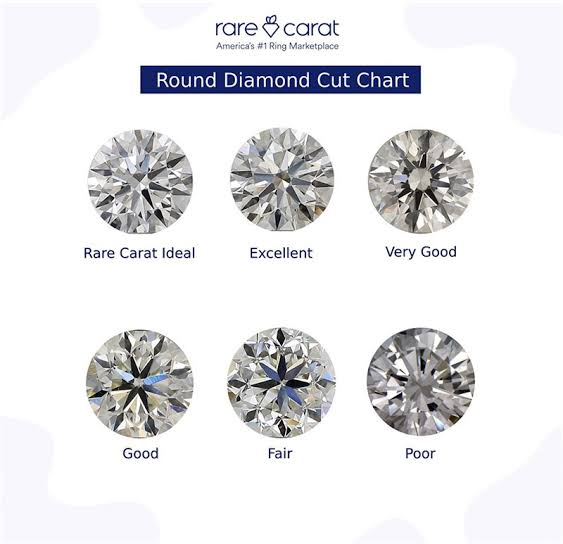

Una manera de identificar que un diamante tenga un buen corte es medir el porcentaje de profundidad de depth y table.
#####b.1. Depth :
La profundidad de un diamante se mide de dos maneras: a. En milímetros, de la superficie al culet. b. El porcentaje de profundidad en relación con su anchura.
#####b.2. Table:
Es la faceta más grande de un diamante y juega un papel vital en su brillo y rendimiento de luz.

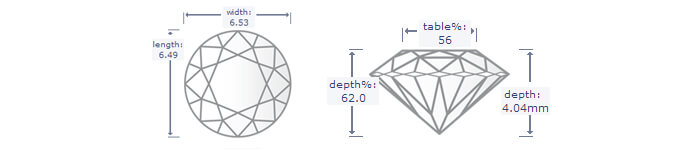

####c. Color
Mide el tinte de un diamante.
- D, E o F: incoloros
- G, H, I o J: casi incoloros
- K, L o M: amarillo tenue
- N - R: amarillo muy claro
- S - Z: amarillo claro

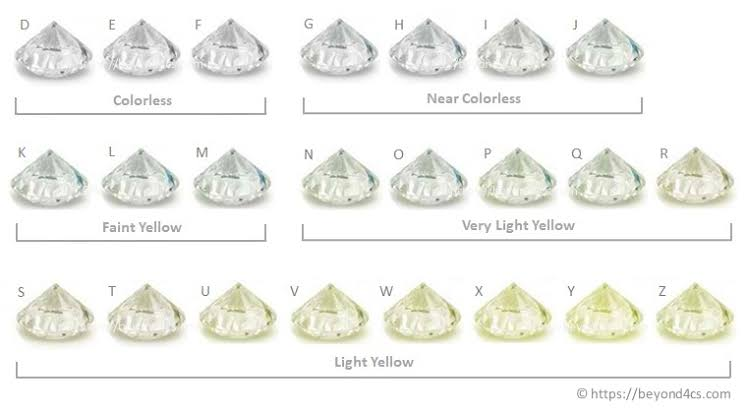

####d. Clarity
Mide la pureza de un diamante. La claridad juzga qué tan libre está el diamante de imperfecciones. Cuanto mayor sea el grado de claridad, mayor será el valor del diamante (y más raro es).

Los grados de claridad utilizados por el Instituto Gemológico de América son:
- IF - FL
- VVS1 - VVS2
- VS1 - VS2
- SI1 - SI2
- I1 - I3

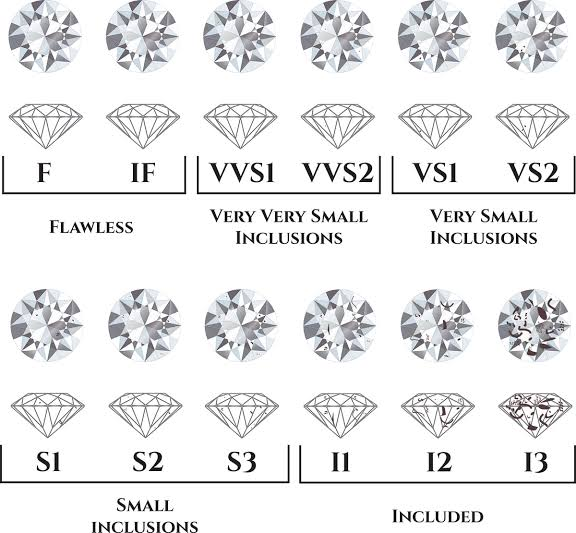

## 1.2. Pre-Procesamiento de Datos

a) Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

b) Dataset de predicción de diamante

In [ ]:
dataset = pd.read_csv('/content/dataset.csv')

# Eliminar la 1era columna que hace referencia al ID de cada fila
dataset = dataset.drop(columns=['Unnamed: 0'])

dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


c) Transformar los tipos de datos "cadena" a "numéricos"

In [ ]:
unique_values_cut, dataset['cut'] = np.unique(dataset['cut'], return_inverse=True)
unique_values_color, dataset['color'] = np.unique(dataset['color'], return_inverse=True)
unique_values_clarity, dataset['clarity'] = np.unique(dataset['clarity'], return_inverse=True)

# Aumentar en 1 para que no empieze desde el 0
dataset['cut'] += 1
dataset['color'] += 1
dataset['clarity'] += 1

*Valores asociados por cada atributo de tipo cadena*

In [ ]:
cut = {v: i + 1 for i, v in enumerate(unique_values_cut)}
color = {v: i + 1 for i, v in enumerate(unique_values_color)}
clarity = {v: i + 1 for i, v in enumerate(unique_values_clarity)}

print(cut)
print(color)
print(clarity)

{'Fair': 1, 'Good': 2, 'Ideal': 3, 'Premium': 4, 'Very Good': 5}
{'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
{'I1': 1, 'IF': 2, 'SI1': 3, 'SI2': 4, 'VS1': 5, 'VS2': 6, 'VVS1': 7, 'VVS2': 8}


d) Dividir los datos en datos de entrenamiento y prueba

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

e) Separamos nuestra variable objetivo (y) y atributos (x) tanto en "train" y "test"

In [ ]:
train_features = train_dataset.drop(["price"], axis=1)
train_labels = train_dataset[["price"]]

test_features = test_dataset.drop(["price"], axis=1)
test_labels = test_dataset[["price"]]

f) Normalizamos nuestros atributos tanto en "train" y "test"

In [ ]:
train_mean = train_features.mean()
train_std = train_features.std()

train_features = (train_features - train_mean) / train_std
test_features = (test_features - train_mean) / train_std

*Conjunto de train normalizado*


In [ ]:
train_features

,carat,cut,color,clarity,depth,table,x,y,z
34665,-1.028116,-0.539605,-0.938475,0.672466,-0.033841,-0.650237,-1.228339,-1.237332,-1.224781
36941,-0.964794,1.408291,-0.351959,-0.485631,-0.801649,0.242682,-1.050148,-1.011184,-1.097745
14973,1.631441,0.434343,1.994107,-0.485631,-1.499656,-0.650237,1.658360,1.537326,1.358278
19891,0.850460,-0.539605,0.234558,0.093417,0.384963,-0.650237,0.927776,0.945863,0.977171
41070,-0.711502,-0.539605,1.407590,-1.643728,0.315163,-1.096697,-0.702675,-0.663265,-0.646063
...,...,...,...,...,...,...,...,...,...
22623,1.758087,-0.539605,0.234558,-0.485631,0.594366,-1.989616,1.622722,1.528628,1.654695
11095,0.639384,0.434343,-0.351959,-0.485631,0.175561,0.689141,0.794132,0.754507,0.793675
10092,0.217232,-1.513553,-0.351959,-1.064679,1.292373,-1.096697,0.375383,0.337004,0.511373
26364,-1.007009,1.408291,0.234558,0.093417,0.873569,-1.096697,-1.228339,-1.176446,-1.111860


*Conjunto de test normalizado*


In [ ]:
test_features

,carat,cut,color,clarity,depth,table,x,y,z
10,-1.049224,-1.513553,1.994107,-1.064679,1.571576,-1.096697,-1.317435,-1.263426,-1.140091
11,-1.196977,-0.539605,1.994107,0.093417,0.733967,-0.650237,-1.602541,-1.593949,-1.521198
13,-1.028116,-0.539605,1.994107,-0.485631,0.315163,-1.543156,-1.228339,-1.185144,-1.168321
19,-1.049224,1.408291,1.994107,-1.064679,0.664166,0.689141,-1.353073,-1.272124,-1.238896
21,-1.196977,1.408291,-0.938475,0.672466,1.431975,-1.096697,-1.673818,-1.576553,-1.492968
...,...,...,...,...,...,...,...,...,...
53916,-0.120490,-1.513553,-1.524991,-1.064679,0.943369,0.689141,-0.016638,0.006480,0.102036
53919,-0.078274,-0.539605,1.407590,1.251514,0.315163,-1.096697,0.143734,0.119554,0.172612
53927,-0.014952,-1.513553,-0.351959,-1.064679,-2.546667,0.689141,0.295196,0.345702,0.003231
53936,-0.162705,-1.513553,-1.524991,-1.064679,0.943369,-1.096697,-0.034458,0.015178,0.102036


## 1.3. Diseño de la arquitectura del modelo de red neuronal multicapa

a) Definimos el modelo de red neuronal

In [ ]:
model = keras.Sequential([
    layers.Dense(100, activation="relu", input_shape=[len(train_features.keys())]),
    layers.Dense(30, activation="relu"),
    layers.Dense(1)
])

b) Resumen completo del modelo de red neuronal

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1000      
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,061
Trainable params: 4,061
Non-trainable params: 0
_________________________________________________________________


## 1.4. Entrenamiento del modelo

a) Compilamos el modelo

In [ ]:
model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])

b) Entrenamos el modelo

In [ ]:
history = model.fit(train_features, train_labels, epochs=350, validation_data=(test_features, test_labels))

Epoch 1/350
1349/1349 [==============================] - 5s 3ms/step - loss: 10716867.0000 - mae: 1908.3053 - mse: 10716867.0000 - val_loss: 1633317.6250 - val_mae: 816.3091 - val_mse: 1633317.6250
Epoch 2/350
1349/1349 [==============================] - 3s 2ms/step - loss: 1712266.6250 - mae: 775.2579 - mse: 1712266.6250 - val_loss: 1482857.1250 - val_mae: 762.0547 - val_mse: 1482857.1250
Epoch 3/350
1349/1349 [==============================] - 4s 3ms/step - loss: 1615552.0000 - mae: 733.5638 - mse: 1615552.0000 - val_loss: 1421430.3750 - val_mae: 731.0154 - val_mse: 1421430.3750
Epoch 4/350
1349/1349 [==============================] - 3s 3ms/step - loss: 1559879.2500 - mae: 717.7794 - mse: 1559879.2500 - val_loss: 1395617.7500 - val_mae: 724.4003 - val_mse: 1395617.7500
Epoch 5/350
1349/1349 [==============================] - 3s 2ms/step - loss: 1521627.5000 - mae: 708.4570 - mse: 1521627.5000 - val_loss: 1381404.2500 - val_mae: 716.9889 - val_mse: 1381404.2500
Epoch 6/350
1349/1349 

## 1.5. Evaluación y métricas

a) Error cuadrático medio (MSE)

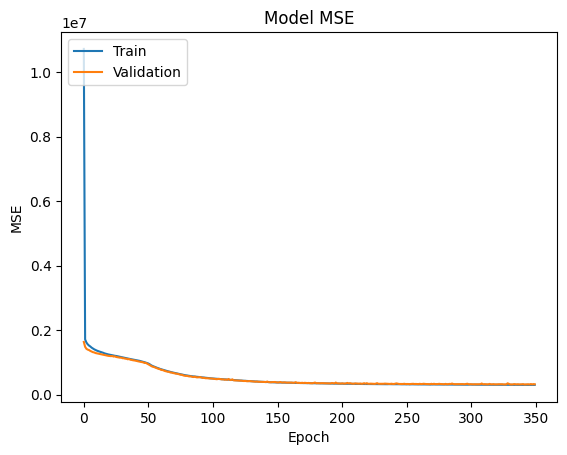

In [ ]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

b) Erro absoluto medio (MAE)

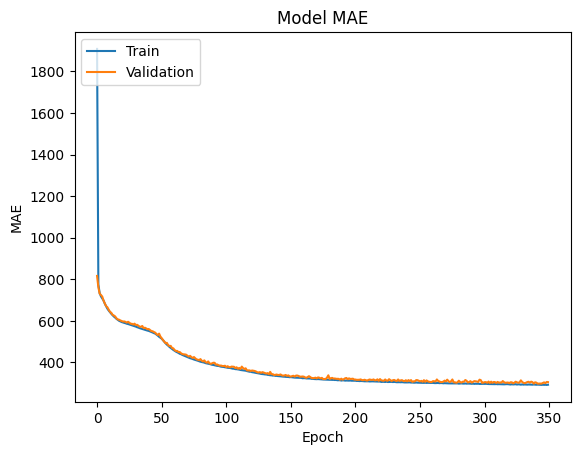

In [ ]:
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.title("Model MAE")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

## 1.6. Experimentación comparativa con los datos de test

a) Comparación de precios reales y los predichos

338/338 [==============================] - 0s 1ms/step


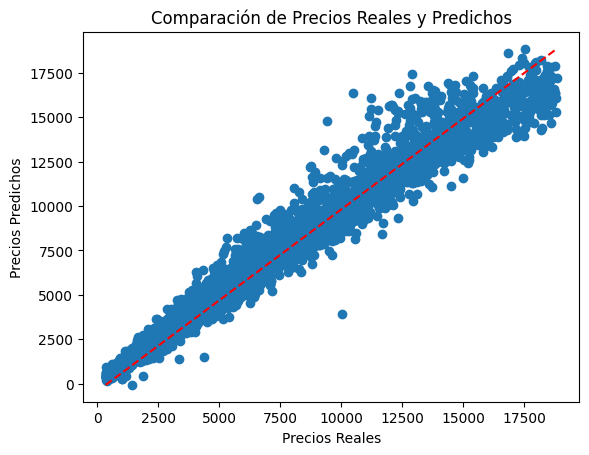

In [ ]:
pred = model.predict(test_features)
test_labels_u = np.array(test_labels).flatten()

plt.scatter(test_labels_u, pred)
plt.plot([min(test_labels_u), max(test_labels_u)], [min(pred), max(pred)], color='red', linestyle='--')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.title('Comparación de Precios Reales y Predichos')
plt.show()

b) Comparación con los demás atributos

1349/1349 [==============================] - 3s 2ms/step


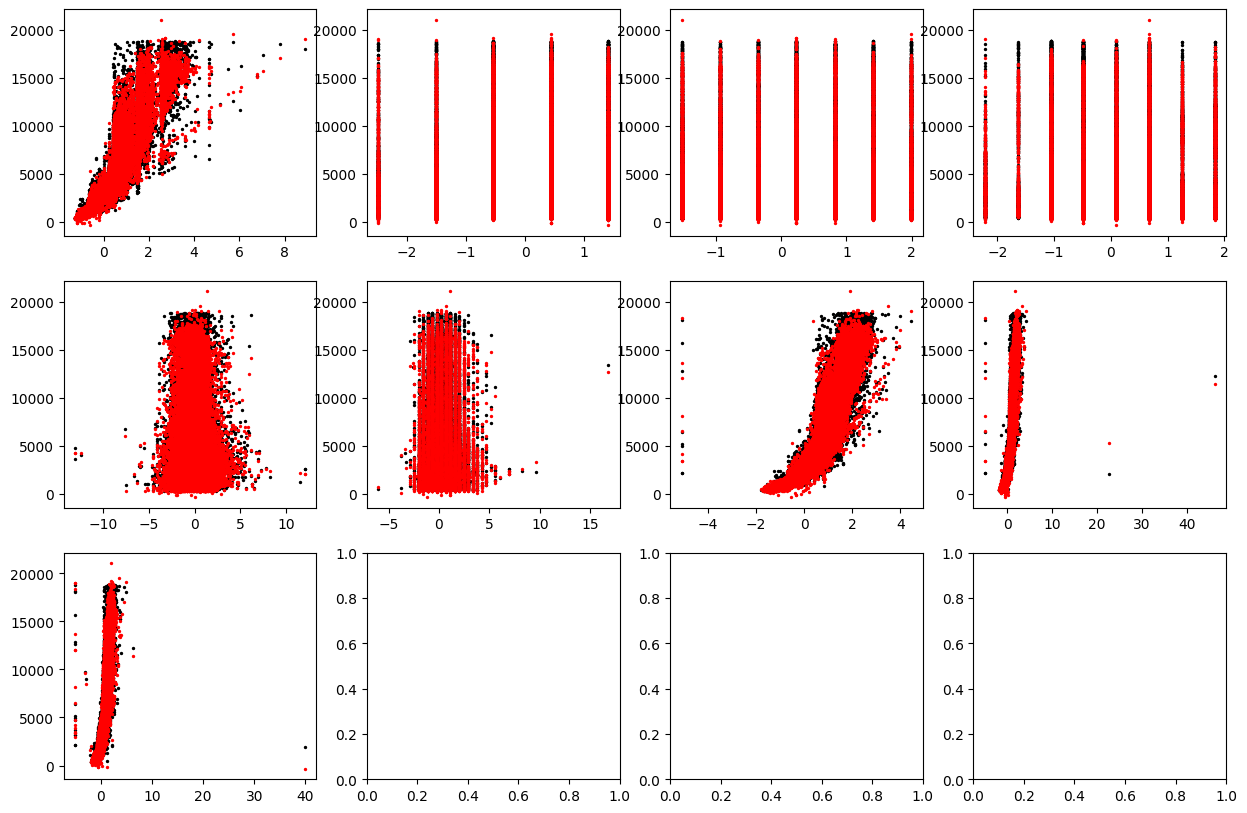

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(train_features.columns):
    axs[i].scatter(train_features[column], train_labels, s=2, color='black')
    axs[i].scatter(train_features[column], model.predict(train_features), s=2, color='red')